# Heart Disease

### Overview:

Cardiovascular diseases (CVDs) remain the leading cause of death worldwide, claiming about 17.9 million lives each year, which represents nearly 31% of global deaths. The majority of these cases (4 out of 5) are linked to heart attacks and strokes, and sadly, a third of the victims die prematurely before the age of 70.

Heart failure often arises as a consequence of CVD, and this dataset provides 11 key attributes that can be analyzed to predict the likelihood of developing heart disease.

Individuals who already have cardiovascular conditions—or those at high risk due to factors such as high blood pressure, diabetes, high cholesterol, or existing heart problems—require early detection and effective treatment. In such cases, machine learning models can play a crucial role in identifying risks and assisting with timely intervention.



### Data Dictionary – Attribute Information:

- Age: Patient’s age (in years)
- Sex: Gender of the patient (M: Male, F: Female)
- ChestPainType: Type of chest pain (TA: Typical Angina, ATA: Atypical Angina, - NAP: Non-Anginal Pain, ASY: Asymptomatic)
- RestingBP: Resting blood pressure (mm Hg)
- Cholesterol: Serum cholesterol level (mg/dl)
- FastingBS: Fasting blood sugar (1: >120 mg/dl, 0: ≤120 mg/dl)
- RestingECG: Resting electrocardiogram results (Normal, ST: ST-T wave - abnormality, LVH: Left Ventricular Hypertrophy by Estes' criteria)
- MaxHR: Maximum heart rate achieved (60–202 bpm)
- ExerciseAngina: Exercise-induced angina (Y: Yes, N: No)
Oldpeak: ST depression induced by exercise (numeric value)
- ST_Slope: Slope of the peak exercise ST segment (Up: upsloping, Flat: flat, - Down: downsloping)
- HeartDisease: Target variable (1: presence of heart disease, 0: normal condition)


### Project Goal

The primary aim of this project is to develop a heart disease prediction system that supports doctors in delivering more accurate diagnoses. The system is designed with two main objectives in mind:

- Emphasize Early Detection – The model should be highly effective at identifying patients who truly have heart disease. Missing such cases could delay treatment and put patients at severe risk. To address this, the system will prioritize high recall, ensuring that as few true cases as possible are missed.

- Ensure Interpretability and Clarity – Beyond providing a prediction, the system will clearly explain the reasoning behind its decision. It will highlight critical health factors—such as blood pressure, cholesterol levels, and chest pain type—so that patients can better understand their condition and take informed steps toward prevention or treatment.


🔗 Kaggle Link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from matplotlib.patches import Patch
from plotly.subplots import make_subplots

Read and check the data

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [7]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [8]:
data['Age'].value_counts()

,count
Age,
54,51
58,42
55,41
56,38
57,38
52,36
62,35
59,35
51,35


In [9]:
data['Sex'].value_counts()

,count
Sex,
M,725
F,193


In [10]:
data['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [11]:
data['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [12]:
data['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [13]:
data['RestingBP'].value_counts()

,count
RestingBP,
120,132
130,118
140,107
110,58
150,55
...,...
101,1
117,1
192,1


In [14]:
data['Oldpeak'].value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


In [15]:
data['MaxHR'].value_counts()

,count
MaxHR,
150,43
140,41
120,36
130,33
160,25
...,...
192,1
195,1
194,1


In [16]:
data['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [17]:
data['FastingBS'].value_counts()

,count
FastingBS,
0,704
1,214


In [18]:
data['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [19]:
data['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


Start EDA

In [20]:
custom_colors = ["#a8d5a2", "#e74c3c"]

counts = data["HeartDisease"].value_counts().sort_index()
labels = ["No Heart Disease (0)", "Heart Disease (1)"]

colors = [custom_colors[0], custom_colors[1]]

# Create interactive donut chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=counts,
    hole=0.5,  # donut style
    marker=dict(colors=colors, line=dict(color="#ffffff", width=2)),
    textinfo='label+percent',
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>"
)])

fig.update_layout(
    title="Heart Disease Distribution",
    annotations=[dict(text="Heart Disease", x=0.5, y=0.5, font_size=16, showarrow=False)],
    width=500,
    height=500
)

fig.show()

In [21]:
# ---- Color palette (fixed order: 0 -> yellow, 1 -> red)
custom_colors = ["#a8d5a2", "#e74c3c"]
color_map = {0: custom_colors[0], 1: custom_colors[1]}


total = len(data)
counts_overall = data["HeartDisease"].value_counts().sort_index()  # index: 0,1
labels = ["No Heart Disease (0)", "Heart Disease (1)"]
values = [int(counts_overall.get(0, 0)), int(counts_overall.get(1, 0))]
colors = [color_map[0], color_map[1]]

# Percent strings for text labels
pct_overall = [f"{v/total*100:.1f}%" if total > 0 else "0.0%" for v in values]
text_overall = [f"{labels[i]}<br>{values[i]} | {pct_overall[i]}" for i in range(2)]

# ---- Per-sex donuts
def sex_counts(sex_code):
    sub = data[data["Sex"] == sex_code]
    n = len(sub)
    c = sub["HeartDisease"].value_counts().sort_index()
    v = [int(c.get(0, 0)), int(c.get(1, 0))]
    pct = [f"{(v[i]/n*100):.1f}%" if n > 0 else "0.0%" for i in range(2)]
    text = [f"{labels[i]}<br>{v[i]} | {pct[i]}" for i in range(2)]
    return v, pct, text, n

men_vals, men_pct, men_text, men_n = sex_counts("M")
women_vals, women_pct, women_text, women_n = sex_counts("F")

# ---- Build subplots: Overall | Men | Women
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{"type":"domain"}, {"type":"domain"}, {"type":"domain"}]],
    subplot_titles=("Overall", "Men", "Women")
)

# ---- Overall donut
fig.add_trace(go.Pie(
    labels=labels,
    values=values,
    hole=0.55,
    marker=dict(colors=colors, line=dict(color="#ffffff", width=2)),
    pull=[0, 0.08],  # explode the positive slice
    text=text_overall,
    textinfo='none',
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>"
), 1, 1)

# ---- Men donut
fig.add_trace(go.Pie(
    labels=labels,
    values=men_vals,
    hole=0.55,
    marker=dict(colors=colors, line=dict(color="#ffffff", width=2)),
    pull=[0, 0.08],
    text=men_text,
    textinfo='none',
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>"
), 1, 2)

# ---- Women donut
fig.add_trace(go.Pie(
    labels=labels,
    values=women_vals,
    hole=0.55,
    marker=dict(colors=colors, line=dict(color="#ffffff", width=2)),
    pull=[0, 0.08],
    text=women_text,
    textinfo='none',
    hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>"
), 1, 3)

# ---- Put the count|percent labels inside slices (clean and readable)
fig.update_traces(
    textposition='inside',
    selector=dict(type='pie')
)

# ---- Center annotations (total + prevalence)
overall_prev = f"{(values[1]/total*100):.1f}%" if total > 0 else "0.0%"
men_prev = f"{(men_vals[1]/men_n*100):.1f}%" if men_n > 0 else "0.0%"
women_prev = f"{(women_vals[1]/women_n*100):.1f}%" if women_n > 0 else "0.0%"

fig.add_annotation(text=f"Total: {total}<br>Prevalence: {overall_prev}",
                   x=0.12, y=0.5, xref="paper", yref="paper", showarrow=False, font_size=12)
fig.add_annotation(text=f"N={men_n}<br>Prev={men_prev}",
                   x=0.5, y=0.5, xref="paper", yref="paper", showarrow=False, font_size=12)
fig.add_annotation(text=f"N={women_n}<br>Prev={women_prev}",
                   x=0.88, y=0.5, xref="paper", yref="paper", showarrow=False, font_size=12)

# ---- Layout polish
fig.update_layout(
    title="Heart Disease Distribution — Overall and by Sex",
    legend=dict(orientation="h", yanchor="bottom", y=-0.1, xanchor="center", x=0.5),
    width=1000,
    height=450,
    margin=dict(l=30, r=30, t=80, b=80)
)

fig.show()


Men: Out of 725 men, 458 have heart disease, which is roughly 63% of the male population. In comparison, 267 men do not have heart disease.

Women: Out of 193 women, 50 have heart disease, about 26% of the female population, while 143 women are free from heart disease.

In summary:

Among men, those with heart disease (458) outnumber those without (267).

Among women, the majority are without heart disease (143 vs. 50 with heart disease).

In [22]:
# Theme colors
color_map = {0: "#a8d5a2", 1: "#e74c3c"}

# Order and labels
cp_order = ['TA', 'ATA', 'NAP', 'ASY']
cp_labels = {
    'TA': 'Typical Angina',
    'ATA': 'Atypical Angina',
    'NAP': 'Non-Anginal Pain',
    'ASY': 'Asymptomatic'
}

# Prepare subplots (one donut per chest pain type)
fig = make_subplots(rows=1, cols=len(cp_order),
                    specs=[[{'type':'domain'}]*len(cp_order)],
                    subplot_titles=[cp_labels[c] for c in cp_order])

for i, cp in enumerate(cp_order, start=1):
    subset = data[data['ChestPainType'] == cp]
    counts = subset['HeartDisease'].value_counts().reindex([0,1], fill_value=0)
    labels = ['Normal (0)', 'Heart Disease (1)']
    colors = [color_map[0], color_map[1]]

    fig.add_trace(go.Pie(
        labels=labels,
        values=counts,
        hole=0.5,
        marker=dict(colors=colors, line=dict(color="#ffffff", width=2)),
        textinfo='percent',
        hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>",
        showlegend=(i==1)  # show legend only for first plot
    ), row=1, col=i)

fig.update_layout(
    title="Heart Disease Distribution by Chest Pain Type",
    width=1200,
    height=500
)

fig.show()


Chest Pain Types

Typical Angina (TA): Chest pressure or squeezing triggered by activity or stress, relieved by rest. Usually indicates blocked or narrowed heart arteries.

Atypical Angina (ATA): Chest pain that doesn’t follow the typical pattern—it may be sharp, brief, or unrelated to exercise. Can be heart-related or caused by other conditions.

Non-Anginal Pain (NAP): Chest pain not caused by the heart, often from muscles, ribs, or the esophagus. Heart tests rule out cardiac causes.

Asymptomatic (ASY): No chest pain, but the heart may still be at risk (silent ischemia or silent heart attack).

Risk Overview

Most Dangerous: Asymptomatic—no warning, can cause serious heart damage or sudden death.

Highly Dangerous: Typical and Atypical Angina—both signal possible coronary artery disease. ATA may delay diagnosis due to atypical symptoms.

Less Dangerous (Still Important): Non-Anginal Pain—not usually life-threatening but underlying causes can be serious.

Key Takeaway: Any unexplained or severe chest pain warrants immediate medical attention. Silent heart problems are the trickiest and most dangerous.

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Theme colors
color_map = {0: "#7ddc7a", 1: "#e74c3c"}  # changed yellow → green

# Order and labels for RestingECG
ecg_order = sorted(data['RestingECG'].unique())  # e.g., ['LVH', 'Normal', 'ST']
ecg_labels = {ecg: f"RestingECG: {ecg}" for ecg in ecg_order}

# Prepare subplots (one donut per RestingECG type)
fig = make_subplots(rows=1, cols=len(ecg_order),
                    specs=[[{'type':'domain'}]*len(ecg_order)],
                    subplot_titles=[ecg_labels[e] for e in ecg_order])

for i, ecg in enumerate(ecg_order, start=1):
    subset = data[data['RestingECG'] == ecg]
    counts = subset['HeartDisease'].value_counts().reindex([0, 1], fill_value=0)
    labels = ['Normal (0)', 'Heart Disease (1)']
    colors = [color_map[0], color_map[1]]

    fig.add_trace(go.Pie(
        labels=labels,
        values=counts,
        hole=0.5,
        marker=dict(colors=colors, line=dict(color="#ffffff", width=2)),
        textinfo='percent',
        hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>",
        showlegend=(i==1)  # legend only for first donut
    ), row=1, col=i)

fig.update_layout(
    title="Heart Disease Distribution by RestingECG",
    width=1200,
    height=500
)

fig.show()


Resting ECG Categories

Normal: Heart shows a regular electrical pattern at rest. Least dangerous, but

*   a normal ECG doesn’t guarantee total heart health. Some conditions may exist without ECG changes.
*   ST-T Wave Abnormality (ST): Unusual ST or T wave shapes, such as elevation, depression, or inversion. Can indicate myocardial ischemia, heart attack, or underlying heart disease. Danger depends on pattern and overall health—more serious than normal ECG.
*   Left Ventricular Hypertrophy (LVH): Thickening of the heart’s main pumping chamber due to long-term strain (often high blood pressure). Most dangerous ECG finding, predicting heart failure, coronary disease, arrhythmias, or sudden cardiac death.


Danger Level Summary:

- Most dangerous: LVH—signals chronic, high-risk heart problems.

- Highly dangerous: ST-T abnormalities—may indicate acute or underlying heart issues.

- Least dangerous: Normal—generally healthy, but does not rule out all heart conditions.

Observations – Resting ECG and Heart Disease

- Normal ECG is most common:

267 patients (29.1%) had a Normal ECG without heart disease.

285 patients (31.0%) had a Normal ECG with heart disease.

Even with a normal ECG, a large number have heart disease, so a normal reading alone doesn’t rule it out.

- ST-T abnormalities are often linked to heart disease:

61 patients (6.6%) with ST abnormalities were free of heart disease.

117 patients (12.7%) with ST abnormalities had heart disease.

ST abnormalities occur more frequently in those with heart disease than in healthy individuals.

- LVH also shows higher heart disease prevalence:

82 patients (8.9%) with LVH were without heart disease.

106 patients (11.5%) with LVH had heart disease.

LVH is more common among patients with heart disease, similar to ST abnormalities.

- Proportional trend:

In ST and LVH groups, the heart disease counts are higher than the normal ECG group.

In the Normal group, heart disease and non-disease counts are almost equal, indicating a balanced distribution.-

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Theme colors (0 -> green, 1 -> red)
color_map = {0: "#7ddc7a", 1: "#e74c3c"}  # changed yellow → green

# Order & labels for ExerciseAngina
ea_order = ['N', 'Y']  # No / Yes
ea_labels = {'N': 'Exercise Angina: No', 'Y': 'Exercise Angina: Yes'}

# Subplots (one donut per EA level)
fig = make_subplots(rows=1, cols=len(ea_order),
                    specs=[[{'type':'domain'}]*len(ea_order)],
                    subplot_titles=[ea_labels[e] for e in ea_order])

for i, ea in enumerate(ea_order, start=1):
    subset = data[data['ExerciseAngina'] == ea]
    counts = subset['HeartDisease'].value_counts().reindex([0, 1], fill_value=0)
    labels = ['Normal (0)', 'Heart Disease (1)']
    colors = [color_map[0], color_map[1]]

    fig.add_trace(go.Pie(
        labels=labels,
        values=counts,
        hole=0.5,
        marker=dict(colors=colors, line=dict(color="#ffffff", width=2)),
        textinfo='percent',
        hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>",
        showlegend=(i==1)  # legend only on first donut
    ), row=1, col=i)

fig.update_layout(
    title="Heart Disease Distribution by Exercise Angina (Y/N)",
    width=800,
    height=450
)

fig.show()


Exercise Angina vs. Atypical Angina

- Exercise Angina (Y/N):

A specific symptom asking whether physical activity triggers chest pain.

Yes (Y): Pain occurs with exercise and goes away with rest — high danger, indicates possible coronary artery disease.

No (N): Pain is not triggered by exercise — generally less dangerous, but could still indicate a silent or severe heart condition.

- Atypical Angina (ATA):

A broader diagnosis based on the pattern, quality, and context of chest pain.

Pain may or may not be triggered by exercise and doesn’t fit the classic pattern of typical angina.

Can be caused by heart disease or other conditions like lung or gastrointestinal issues.

- Key Difference:
Exercise Angina is a single yes/no symptom, while Atypical Angina is a category of chest pain that considers multiple factors. A patient with atypical angina may or may not have exercise-induced symptoms.

Observations: Exercise-Induced Angina

- No Exercise Angina (N):

1. Normal (no heart disease): 355 patients (38.7%)

2. Heart disease: 192 patients (20.9%)

3. Most people without exercise-induced angina are healthy, but about 21% still have heart disease.

- Yes Exercise Angina (Y):

1. Normal: 55 patients (6.0%)

2. Heart disease: 316 patients (34.4%)

3. Among those with exercise-induced angina, heart disease is very common (~85%).

- Key Insight:

Exercise-induced angina is a strong predictor of heart disease. Patients with ExerciseAngina = Y are over 4 times more likely to have heart disease than those with N, making it an important feature for screening and risk assessment.

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Theme colors (0 -> green, 1 -> red)
color_map = {0: "#7ddc7a", 1: "#e74c3c"}  # changed yellow → green

# Order & labels for ST_Slope
st_order = sorted(data['ST_Slope'].unique())  # e.g., ['Down', 'Flat', 'Up']
st_labels = {st: f"ST Slope: {st}" for st in st_order}

# Subplots (one donut per ST_Slope level)
fig = make_subplots(rows=1, cols=len(st_order),
                    specs=[[{'type':'domain'}]*len(st_order)],
                    subplot_titles=[st_labels[s] for s in st_order])

for i, st in enumerate(st_order, start=1):
    subset = data[data['ST_Slope'] == st]
    counts = subset['HeartDisease'].value_counts().reindex([0, 1], fill_value=0)
    labels = ['Normal (0)', 'Heart Disease (1)']
    colors = [color_map[0], color_map[1]]

    fig.add_trace(go.Pie(
        labels=labels,
        values=counts,
        hole=0.5,
        marker=dict(colors=colors, line=dict(color="#ffffff", width=2)),
        textinfo='percent',
        hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>",
        showlegend=(i==1)  # legend only on first donut
    ), row=1, col=i)

fig.update_layout(
    title="Heart Disease Distribution by ST Slope",
    width=1200,
    height=500
)

fig.show()


## ST Slope (ECG Segment)
The ST slope measures the shape of the ST segment on an ECG during exercise. Changes in this segment can signal heart problems, as insufficient oxygen reaches the heart muscle under stress.

- Upsloping (Up):

ST segment rises after the R-wave.

Danger Level: Least dangerous — often normal or low risk.

- Flat:

ST segment is horizontal.

Danger Level: Moderately dangerous — may indicate coronary artery disease and requires further evaluation.

- Downsloping (Down):

ST segment slopes downward.

Danger Level: Most dangerous — strong sign of significant heart disease and high risk of heart attack.

Observations – ST Slope and Heart Disease

- Upsloping: Mostly seen in healthy individuals — 317 normal cases (34.5%) vs. 78 with heart disease (8.5%). Indicates generally normal heart function.

- Flat: Strongly linked to heart disease — 381 cases (41.5%) vs. 79 normal (8.6%). This is the most common pattern among heart disease patients.

- Downsloping: Less frequent but high-risk — 49 heart disease cases (5.3%) vs. 14 normal (1.5%). Suggests significant heart issues when present.

Key Insight:

An upsloping ST segment usually signals normal function, a flat slope is a strong heart disease indicator, and a downsloping segment, though rare, carries serious risk.

In [26]:
# Theme colors (HeartDisease: 0 -> green, 1 -> red)
color_map = {0: "#2ecc71", 1: "#e74c3c"}

# Order & labels for FastingBS
fb_order = [0, 1]  # 0: <=120 mg/dl, 1: >120 mg/dl
fb_labels = {0: "FastingBS: 0 (≤120 mg/dl)", 1: "FastingBS: 1 (>120 mg/dl)"}

# Subplots (one donut per FastingBS level)
fig = make_subplots(rows=1, cols=len(fb_order),
                    specs=[[{'type': 'domain'}]*len(fb_order)],
                    subplot_titles=[fb_labels[v] for v in fb_order])

for i, fb in enumerate(fb_order, start=1):
    subset = data[data['FastingBS'] == fb]
    counts = subset['HeartDisease'].value_counts().reindex([0, 1], fill_value=0)
    labels = ['Normal (0)', 'Heart Disease (1)']
    colors = [color_map[0], color_map[1]]

    fig.add_trace(go.Pie(
        labels=labels,
        values=counts,
        hole=0.5,
        marker=dict(colors=colors, line=dict(color="#ffffff", width=2)),
        textinfo='percent',
        hovertemplate="<b>%{label}</b><br>Count: %{value}<br>Percent: %{percent}<extra></extra>",
        showlegend=(i == 1)  # legend only on first donut
    ), row=1, col=i)

fig.update_layout(
    title="Heart Disease Distribution by Fasting Blood Sugar (FastingBS)",
    width=900,
    height=450
)

fig.show()


Observations – Fasting Blood Sugar vs. Heart Disease

- FastingBS = 0 (≤120 mg/dl):
Most patients are in this group. Distribution is relatively balanced: 39.9% normal vs. 36.8% with heart disease. This shows that normal blood sugar doesn’t rule out heart disease.

- FastingBS = 1 (>120 mg/dl):
Smaller group, but heart disease dominates: 18.5% vs. 4.8% normal. Elevated fasting blood sugar is strongly associated with heart disease.

- Key Insight:

Although most heart disease patients are in the normal FastingBS group due to size, proportionally, high fasting blood sugar (>120 mg/dl) greatly increases the risk of heart disease, suggesting a link between blood sugar control and cardiovascular health.

In [27]:
# --- Age groups ---
bins = [29, 39, 49, 59, 69, 200]
labels = ['30–39', '40–49', '50–59', '60–69', '70+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)
data['SexSimple'] = data['Sex'].map({'M': 'Men', 'F': 'Women'})

# --- Function to compute % per age/sex for a chest pain type ---
def table_for_cp(data, cp):
    denom = (data.groupby(['AgeGroup','SexSimple']).size()
             .rename('total'))
    num = (data[data['ChestPainType'] == cp]
           .groupby(['AgeGroup','SexSimple']).size()
           .rename('count'))
    out = pd.concat([num, denom], axis=1).fillna(0)
    out['pct'] = np.where(out['total']>0, 100*out['count']/out['total'], 0)
    pct_tab = out['pct'].unstack('SexSimple').reindex(labels).fillna(0)
    cnt_tab = out['count'].unstack('SexSimple').reindex(labels).fillna(0).astype(int)
    tot_tab = out['total'].unstack('SexSimple').reindex(labels).fillna(0).astype(int)
    for col in ['Men','Women']:
        if col not in pct_tab.columns:
            pct_tab[col] = 0
            cnt_tab[col] = 0
            tot_tab[col] = 0
    return pct_tab[['Men','Women']], cnt_tab[['Men','Women']], tot_tab[['Men','Women']]

# --- Prepare data for all CP types ---
cp_order = ['TA','ATA','NAP','ASY']
cp_titles = {'TA': 'Typical angina', 'ATA': 'Atypical angina',
             'NAP': 'Non-anginal pain', 'ASY': 'Asymptomatic'}
tabs = {cp: table_for_cp(data, cp) for cp in cp_order}

# --- Function to create heatmap with text labels inside boxes ---
def make_heatmap(z_pct, z_cnt, z_tot, title):
    text_labels = [[f"{z_pct[r,c]:.0f}%" for c in range(2)] for r in range(len(labels))]
    hover_labels = [[f"{labels[r]}<br>{['Men','Women'][c]}<br>"
                     f"<b>{z_pct[r,c]:.0f}%</b> "
                     f"({int(z_cnt[r,c])} / {int(z_tot[r,c])})"
                     for c in range(2)] for r in range(len(labels))]
    return go.Heatmap(
        z=z_pct,
        x=['Men','Women'],
        y=labels,
        text=text_labels,
        texttemplate="%{text}",
        textfont={"size":14, "color":"black"},
        hoverinfo='text',
        textsrc=None,
        customdata=hover_labels,
        hovertemplate="%{customdata}<extra></extra>",
        coloraxis="coloraxis"
    )

# --- Create initial figure ---
pct0, cnt0, tot0 = tabs[cp_order[0]]
fig = go.Figure(make_heatmap(pct0.values, cnt0.values, tot0.values, cp_titles[cp_order[0]]))

# --- Frames for dropdown animation ---
frames = []
for cp in cp_order:
    pct, cnt, tot = tabs[cp]
    frames.append(go.Frame(
        name=cp,
        data=[make_heatmap(pct.values, cnt.values, tot.values, cp_titles[cp])]
    ))
fig.frames = frames

# --- Custom color scale ---
custom_colorscale = [
    [0.00, "#cfe8cf"],  # Very low
    [0.33, "#a8d5a2"],  # Low
    [0.66, "#2ecc71"],  # Intermediate (changed from yellow to green)
    [1.00, "#e74c3c"]   # High
]

# --- Layout ---
fig.update_layout(
    title=f"Chest Pain Type by Age and Sex (% within age–sex group) – {cp_titles[cp_order[0]]}",
    xaxis_title="Sex",
    yaxis_title="Age Group",
    width=800,
    height=600,
    coloraxis=dict(
        colorscale=custom_colorscale,
        cmin=0,
        cmax=60,
        colorbar_title="%"
    ),
    updatemenus=[dict(
        type="dropdown",
        x=1.05, y=1,
        xanchor="left",
        buttons=[
            dict(label=cp_titles[cp],
                 method="animate",
                 args=[[cp],
                       {"transition": {"duration": 200},
                        "frame": {"duration": 200, "redraw": True},
                        "mode": "immediate"}])
            for cp in cp_order
        ]
    )],
    margin=dict(l=80, r=120, t=80, b=40)
)

fig.show()


/tmp/ipython-input-3105213027.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-3105213027.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-3105213027.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-3105213027.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

Key Medical Takeaways

- Silent heart disease is more common in men, particularly older men → routine screening is important even without symptoms.

- Women often present with atypical chest pain → clinicians should stay alert to heart disease even when symptoms aren’t “classic.”

- Older women frequently report non-anginal pain → careful testing is needed to avoid missing heart disease.

- Typical angina is less common than atypical or asymptomatic cases → relying solely on classic symptoms can be misleading.

Chest Pain Risk by Age and Gender

Table Overview

Rows: Age groups × Gender

Columns: Chest pain type (Typical Angina, Atypical Angina, Non-Anginal, Asymptomatic)

Colors: Heart disease risk (Very Low → High)

Labels: Categorical risk classification

Observations & Insights

1.  Typical Angina

Men <40: High risk — classic exertional chest pain strongly indicates CAD.

Men 40–69: Intermediate risk — symptoms still important, but age introduces other factors.

Women: Mostly Very Low or Low risk — classic angina less predictive; additional testing may be needed.


2. Atypical Angina

Mostly Very Low or Low risk across groups.

Older men (60+): Intermediate risk.

Women: Generally low risk even with atypical symptoms.

Note: Less specific for CAD but shouldn’t be ignored in older/high-risk patients.



️3. Non-Anginal Pain

Risk usually Very Low to Intermediate.

Men 40–69: Intermediate risk.

Women: Mostly Low or Very Low.

Note: Typically non-cardiac, but other risk factors can increase probability in men >40.



4. Asymptomatic

Men: High risk across all ages.

Women: Intermediate to High risk, lower in younger women.

Note: Silent ischemia is common in men and diabetics, underscoring the need for screening even without symptoms.

Key Takeaways

- Young men with typical angina or asymptomatic presentations are already high-risk → early testing is crucial.

- Older men (50–69) remain at intermediate-to-high risk even with atypical or non-anginal pain.

- Women generally have lower risk for the same symptoms, but atypical and silent cases remain diagnostic challenges.

- Asymptomatic presentations are particularly dangerous → reinforces preventive screening in high-risk populations.

In [28]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# -----------------------------
# 1) Buckets & colors (edit if you like)
# -----------------------------
def risk_bucket(p):
    if p < 0.10:   # <10%
        return 'Very low'
    elif p < 0.30: # 10–30%
        return 'Low'
    elif p < 0.70: # 30–70%
        return 'Intermediate'
    else:          # >=70%
        return 'High'

bucket_to_color = {
    'Very low': '#cfe8cf',   # light green
    'Low':      '#a8d5a2',   # green
    'Intermediate': '#f3e55b', # yellow
    'High':     '#e74c3c',   # red
}

# Discrete colorscale for 0–100%. Boundaries at 10,30,70.
discrete_colorscale = [
    (0.00,  bucket_to_color['Very low']), (0.10, bucket_to_color['Very low']),
    (0.10,  bucket_to_color['Low']),      (0.30, bucket_to_color['Low']),
    (0.30,  bucket_to_color['Intermediate']), (0.70, bucket_to_color['Intermediate']),
    (0.70,  bucket_to_color['High']),     (1.00, bucket_to_color['High']),
]

# -----------------------------
# 2) Prepare Age groups & Sex
# -----------------------------
bins = [-np.inf, 39, 49, 59, np.inf]
age_labels = ['<40', '40–49', '50–59', '60+']
data['AgeGroup']  = pd.cut(data['Age'], bins=bins, labels=age_labels)
data['SexSimple'] = data['Sex'].map({'M':'Men', 'F':'Women'})

cp_order  = ['TA', 'ATA', 'NAP', 'ASY']
cp_titles = {'TA':'Typical angina pectoris',
             'ATA':'Atypical angina pectoris',
             'NAP':'Non-anginal chest pain',
             'ASY':'Asymptomatic'}

# -----------------------------
# 3) Compute risk per (AgeGroup, Sex, CP)
# -----------------------------
grp = data.groupby(['AgeGroup','SexSimple','ChestPainType'])
risk = grp['HeartDisease'].mean().reset_index(name='risk')  # 0..1

# Ensure every combo exists
full_idx = pd.MultiIndex.from_product(
    [age_labels, ['Men','Women'], cp_order],
    names=['AgeGroup','SexSimple','ChestPainType']
)
risk = (risk.set_index(['AgeGroup','SexSimple','ChestPainType'])
             .reindex(full_idx)
             .reset_index())
risk['risk'] = risk['risk'].fillna(0.0)

# Also get counts for hover
counts = grp['HeartDisease'].agg(['count','sum']).reset_index()
counts = (counts.set_index(['AgeGroup','SexSimple','ChestPainType'])
                .reindex(full_idx)
                .reset_index()
                .fillna(0))
counts.rename(columns={'count':'n', 'sum':'pos'}, inplace=True)  # pos = #HeartDisease=1

# Merge
risk = risk.merge(counts, on=['AgeGroup','SexSimple','ChestPainType'], how='left')

# -----------------------------
# 4) Build matrix: rows = Age+Sex, cols = CP
# -----------------------------
row_labels = []
for a in age_labels:
    row_labels += [f"{a}\nMen", f"{a}\nWomen"]

# Make z (percent), text (bucket+%), hover text
z_matrix    = np.zeros((len(row_labels), len(cp_order)))
text_matrix = np.empty_like(z_matrix, dtype=object)
hover_matrix= np.empty_like(z_matrix, dtype=object)

for i, rlab in enumerate(row_labels):
    age, sex = rlab.split('\n')
    for j, cp in enumerate(cp_order):
        row = risk[(risk['AgeGroup']==age) & (risk['SexSimple']==sex) & (risk['ChestPainType']==cp)]
        p   = float(row['risk'].values[0]) if len(row) else 0.0
        n   = int(row['n'].values[0]) if len(row) else 0
        pos = int(row['pos'].values[0]) if len(row) else 0

        pct = p * 100
        bucket = risk_bucket(p)

        z_matrix[i, j] = pct / 100.0  # 0..1 for our discrete colorscale
        text_matrix[i, j] = f"{bucket}\n{pct:.0f}%"
        hover_matrix[i, j] = (
            f"<b>{cp_titles[cp]}</b><br>"
            f"{age}, {sex}<br>"
            f"Risk: <b>{pct:.1f}%</b><br>"
            f"Counts: {pos} positive / {n} total"
        )

# -----------------------------
# 5) Plotly Heatmap (interactive)
# -----------------------------
fig = go.Figure(
    data=go.Heatmap(
        z=z_matrix,                # normalized 0..1 for discrete colors
        x=[cp_titles[c] for c in cp_order],
        y=row_labels,
        text=text_matrix,
        texttemplate="%{text}",
        textfont={"size":12, "color":"black"},
        customdata=hover_matrix,
        hovertemplate="%{customdata}<extra></extra>",
        colorscale=discrete_colorscale,
        zmin=0, zmax=1,
        colorbar=dict(
            title="Risk %",
            tickvals=[0.05, 0.20, 0.50, 0.85],
            ticktext=["Very low", "Low", "Intermediate", "High"]
        )
    )
)

fig.update_layout(
    title="Pretest Risk of Heart Disease by Age, Sex, and Chest Pain Type",
    xaxis_title="Chest Pain Type",
    yaxis_title="Age / Gender",
    width=950, height=600,
    margin=dict(l=80, r=100, t=80, b=50)
)

fig.show()


/tmp/ipython-input-664336790.py:50: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



- Exercise-Induced Angina Risk Chart

Chart Overview

Rows: Age × Gender

Columns: Exercise Angina (Yes = Y, No = N)

Cell Color/Label: Heart disease risk level for each group


Key Observations

1. Exercise Angina = Yes → High Risk

Across all ages and sexes, presence of exercise-induced angina corresponds to High or Intermediate risk.

Men: All ages show particularly high risk.

Women <60: Also elevated risk.

Clinical meaning: Chest pain during exertion signals the heart isn’t receiving enough blood — a strong indicator of coronary artery disease (CAD).

2. Exercise Angina = No → Lower Risk

Young adults (<40): Generally Low risk.

Older men (40+): Intermediate risk due to age-related factors, even without angina.

Women: Mostly Low or Very Low risk unless older.

3. Sex Differences

Men consistently show higher baseline risk than women for similar age/angina combinations.

Women without angina rarely exceed Low/Intermediate risk, but presence of angina significantly increases their risk.

4. Age Influence

Risk rises with age, particularly for groups without angina.

For Exercise Angina = Yes, even young adults are already at high risk — the symptom dominates over age effects.


- Clinical Takeaway

Exercise-induced angina is a strong predictor of heart disease — always take it seriously.

Older men without angina still need monitoring due to age-related cardiovascular risk.

Women without angina usually have low pretest probability, but risk evaluation should consider other factors.

In [29]:
# ---------- Age groups & clean labels ----------
bins = [-np.inf, 39, 49, 59, np.inf]
age_labels = ['<40', '40–49', '50–59', '60+']
data['AgeGroup']  = pd.cut(data['Age'], bins=bins, labels=age_labels)
data['SexSimple'] = data['Sex'].map({'M':'Men', 'F':'Women'})

col_order = sorted(data['ExerciseAngina'].unique())  # e.g., ['N','Y']

# ---------- Compute risk P(HD=1 | Age, Sex, ExerciseAngina) + counts ----------
grp = data.groupby(['AgeGroup','SexSimple','ExerciseAngina'])
risk = grp['HeartDisease'].mean().reset_index(name='risk')  # 0..1

# ensure full grid
full_idx = pd.MultiIndex.from_product(
    [age_labels, ['Men','Women'], col_order],
    names=['AgeGroup','SexSimple','ExerciseAngina']
)
risk = (risk.set_index(['AgeGroup','SexSimple','ExerciseAngina'])
            .reindex(full_idx)
            .reset_index())
risk['risk'] = risk['risk'].fillna(0.0)

counts = grp['HeartDisease'].agg(['count','sum']).reset_index()
counts = (counts.set_index(['AgeGroup','SexSimple','ExerciseAngina'])
                .reindex(full_idx)
                .reset_index()
                .fillna(0))
counts.rename(columns={'count':'n','sum':'pos'}, inplace=True)

risk = risk.merge(counts, on=['AgeGroup','SexSimple','ExerciseAngina'], how='left')

# ---------- Risk buckets & discrete colors ----------
def bucket(p):
    if p < 0.10:   return 'Very low'
    if p < 0.30:   return 'Low'
    if p < 0.70:   return 'Intermediate'
    return 'High'

bucket_to_color = {
    'Very low': '#cfe8cf',   # light green
    'Low':      '#a8d5a2',   # green
    'Intermediate': '#f3e55b', # yellow
    'High':     '#e74c3c'    # red
}

# map to a discrete colorscale over 0..1 with cut points at 0.1/0.3/0.7
colorscale = [
    (0.00, bucket_to_color['Very low']), (0.10, bucket_to_color['Very low']),
    (0.10, bucket_to_color['Low']),      (0.30, bucket_to_color['Low']),
    (0.30, bucket_to_color['Intermediate']), (0.70, bucket_to_color['Intermediate']),
    (0.70, bucket_to_color['High']),     (1.00, bucket_to_color['High']),
]

# ---------- Build matrices: rows = Age\nSex, cols = Exercise Angina ----------
row_labels = [f"{a}\nMen" for a in age_labels] + [f"{a}\nWomen" for a in age_labels]

z = np.zeros((len(row_labels), len(col_order)))       # normalized 0..1
text = np.empty_like(z, dtype=object)                 # label inside cell
hover = np.empty_like(z, dtype=object)                # hover text

def lookup(age, sex, ea):
    r = risk[(risk['AgeGroup']==age) & (risk['SexSimple']==sex) & (risk['ExerciseAngina']==ea)]
    if len(r)==0: return 0.0, 0, 0
    return float(r['risk'].values[0]), int(r['pos'].values[0]), int(r['n'].values[0])

for i, rlab in enumerate(row_labels):
    age, sex = rlab.split('\n')
    for j, ea in enumerate(col_order):
        p, pos, n = lookup(age, sex, ea)
        pct = p * 100
        z[i, j] = p  # 0..1
        b = bucket(p)
        text[i, j]  = f"{b}\n{pct:.0f}%"
        hover[i, j] = (f"<b>Exercise Angina: {ea}</b><br>"
                       f"{age}, {sex}<br>"
                       f"Risk: <b>{pct:.1f}%</b><br>"
                       f"Counts: {pos} positive / {n} total")

# ---------- Plot ----------
fig = go.Figure(
    data=go.Heatmap(
        z=z, x=[f"Exercise Angina: {ea}" for ea in col_order], y=row_labels,
        colorscale=colorscale, zmin=0, zmax=1,
        text=text, texttemplate="%{text}", textfont={"size":12, "color":"black"},
        customdata=hover, hovertemplate="%{customdata}<extra></extra>",
        colorbar=dict(
            title="Risk %",
            tickvals=[0.05, 0.20, 0.50, 0.85],
            ticktext=["Very low","Low","Intermediate","High"]
        )
    )
)

fig.update_layout(
    title="Pretest Risk of Heart Disease by Age, Sex, and Exercise Angina",
    xaxis_title="Exercise Angina",
    yaxis_title="Age / Gender",
    width=800, height=700,
    margin=dict(l=90, r=90, t=80, b=60)
)

fig.show()


/tmp/ipython-input-2593117916.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Resting ECG Risk Chart

Chart Overview

Rows: Age × Gender

Columns: RestingECG categories:

LVH: Left ventricular hypertrophy — structural heart changes often linked to hypertension or heart disease

Normal: No ECG abnormalities

ST: ST-T wave changes — possible ischemia or prior heart attack

Cell Color/Label: Pretest probability of heart disease

Key Observations

1. Strong Age Effect

Men ≥60: High risk for all ECG types — age and other factors elevate risk even if ECG is “Normal.”

Women ≥60: Intermediate risk across all ECG types — elevated but lower than men.

2. ECG Abnormalities in Middle-Aged Men

Men 50–59:

ST → High risk

LVH / Normal → Intermediate risk

Women 50–59: Low to Intermediate risk, generally lower than men.

3. Younger Adults (<40) Mostly Low Risk

Men <40: LVH → Low, Normal → Intermediate, ST → Very Low

Women <40: Very Low to Low risk across all ECG types

Clinical note: Some structural findings may be benign (e.g., athletic heart) unless symptoms or other risk factors exist.


4.  Intermediate Risk Zone for Men 40–49

Men 40–49 → Intermediate risk across all ECG categories

Women 40–49 → Low or Very Low risk

Suggests that even a normal ECG in this age group doesn’t fully rule out disease.

5. ECG Abnormalities in Older Adults

Men ≥50 → ST changes carry the highest risk

Women ≥60 → All ECG types carry Intermediate risk — age dominates the baseline risk

- Clinical Takeaways

Men’s risk rises more sharply with age than women’s, even with normal ECGs.

ST changes and LVH in men ≥50 strongly suggest heart disease.

Younger adults generally have low risk, but ECG findings should be interpreted alongside symptoms and other risk factors.

Women’s risk is lower than men’s at the same age/ECG pattern but reaches Intermediate by age 60+.

In [30]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# ---------- Age groups & tidy labels ----------
bins = [-np.inf, 39, 49, 59, np.inf]
age_labels = ['<40', '40–49', '50–59', '60+']
data['AgeGroup']  = pd.cut(data['Age'], bins=bins, labels=age_labels)
data['SexSimple'] = data['Sex'].map({'M':'Men', 'F':'Women'})

col_order = sorted(data['RestingECG'].unique())  # e.g., ['LVH','Normal','ST']

# ---------- Risk and counts ----------
grp = data.groupby(['AgeGroup','SexSimple','RestingECG'])
risk = grp['HeartDisease'].mean().reset_index(name='risk')  # 0..1

# ensure full grid
full_idx = pd.MultiIndex.from_product(
    [age_labels, ['Men','Women'], col_order],
    names=['AgeGroup','SexSimple','RestingECG']
)
risk = (risk.set_index(['AgeGroup','SexSimple','RestingECG'])
            .reindex(full_idx)
            .reset_index())
risk['risk'] = risk['risk'].fillna(0.0)

counts = grp['HeartDisease'].agg(['count','sum']).reset_index()
counts = (counts.set_index(['AgeGroup','SexSimple','RestingECG'])
                .reindex(full_idx)
                .reset_index()
                .fillna(0))
counts.rename(columns={'count':'n','sum':'pos'}, inplace=True)

risk = risk.merge(counts, on=['AgeGroup','SexSimple','RestingECG'], how='left')

# ---------- Buckets & discrete colors ----------
def bucket(p):
    if p < 0.10:   return 'Very low'
    if p < 0.30:   return 'Low'
    if p < 0.70:   return 'Intermediate'
    return 'High'

bucket_to_color = {
    'Very low': '#cfe8cf',   # light green
    'Low':      '#a8d5a2',   # green
    'Intermediate': '#f3e55b', # yellow
    'High':     '#e74c3c'    # red
}
colorscale = [
    (0.00, bucket_to_color['Very low']), (0.10, bucket_to_color['Very low']),
    (0.10, bucket_to_color['Low']),      (0.30, bucket_to_color['Low']),
    (0.30, bucket_to_color['Intermediate']), (0.70, bucket_to_color['Intermediate']),
    (0.70, bucket_to_color['High']),     (1.00, bucket_to_color['High']),
]

# ---------- Build matrices (rows = Age\nSex, cols = ECG) ----------
row_labels = [f"{a}\nMen" for a in age_labels] + [f"{a}\nWomen" for a in age_labels]

z = np.zeros((len(row_labels), len(col_order)))       # normalized 0..1
text = np.empty_like(z, dtype=object)
hover = np.empty_like(z, dtype=object)

def lookup(age, sex, ecg):
    r = risk[(risk['AgeGroup']==age) & (risk['SexSimple']==sex) & (risk['RestingECG']==ecg)]
    if len(r)==0: return 0.0, 0, 0
    return float(r['risk'].values[0]), int(r['pos'].values[0]), int(r['n'].values[0])

for i, rlab in enumerate(row_labels):
    age, sex = rlab.split('\n')
    for j, ecg in enumerate(col_order):
        p, pos, n = lookup(age, sex, ecg)
        pct = p * 100
        z[i, j] = p
        b = bucket(p)
        text[i, j]  = f"{b}\n{pct:.0f}%"
        hover[i, j] = (f"<b>RestingECG: {ecg}</b><br>"
                       f"{age}, {sex}<br>"
                       f"Risk: <b>{pct:.1f}%</b><br>"
                       f"Counts: {pos} positive / {n} total")

# ---------- Plot ----------
fig = go.Figure(
    data=go.Heatmap(
        z=z,
        x=[f"RestingECG: {c}" for c in col_order],
        y=row_labels,
        colorscale=colorscale, zmin=0, zmax=1,
        text=text, texttemplate="%{text}", textfont={"size":12, "color":"black"},
        customdata=hover, hovertemplate="%{customdata}<extra></extra>",
        colorbar=dict(
            title="Risk %",
            tickvals=[0.05, 0.20, 0.50, 0.85],
            ticktext=["Very low","Low","Intermediate","High"]
        )
    )
)

fig.update_layout(
    title="Pretest Risk of Heart Disease by Age, Sex, and RestingECG",
    xaxis_title="Resting ECG result",
    yaxis_title="Age / Gender",
    width=900, height=700,
    margin=dict(l=90, r=100, t=80, b=60)
)

fig.show()


/tmp/ipython-input-1213309398.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Color theme (0 → yellow, 1 → red)
color_map = {0: "#f3e55b", 1: "#e74c3c"}

def hist_with_box_white(data, col):
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True,
        row_heights=[0.22, 0.78], vertical_spacing=0.05
    )

    # --- Top: horizontal boxplots ---
    for hd in [0, 1]:
        sub = data[data["HeartDisease"] == hd]
        fig.add_trace(
            go.Box(
                x=sub[col],
                y=[str(hd)] * len(sub),
                name=str(hd),
                orientation="h",
                marker_color=color_map[hd],
                boxmean=True,
                showlegend=False
            ),
            row=1, col=1
        )

    # --- Bottom: overlaid histograms ---
    for hd in [0, 1]:
        sub = data[data["HeartDisease"] == hd]
        fig.add_trace(
            go.Histogram(
                x=sub[col],
                name=f"HeartDisease {hd}",
                histnorm="density",
                opacity=0.6,
                marker_color=color_map[hd]
            ),
            row=2, col=1
        )

    # Layout styling
    fig.update_layout(
        template="plotly_white",
        title=f"{col} histogram",
        barmode="overlay",
        legend_title_text="HeartDisease",
        height=650, width=620,
        margin=dict(l=60, r=20, t=60, b=60)
    )
    fig.update_xaxes(title_text=col, row=2, col=1, showgrid=True)
    fig.update_yaxes(title_text="Density", row=2, col=1)

    # Keep the top boxplot clean
    fig.update_yaxes(title_text="", row=1, col=1,
                     tickmode="array", tickvals=["0", "1"],
                     ticktext=["0", "1"], showgrid=False)

    fig.show()

# Example usage:
hist_with_box_white(data, "Age")


Age and Heart Disease Patterns

Insights

- Younger individuals (30–45 years): Most are free of heart disease (HeartDisease = 0), shown by the dominant yellow histogram. Heart disease is uncommon in this group.

- Middle-aged to older individuals (50–65 years): Heart disease cases (HeartDisease = 1, red) become more prevalent.

Boxplot distribution:

- HeartDisease = 1 → higher median age, tightly clustered around 50–65 years

- HeartDisease = 0 → lower median age, wider spread toward younger ages

Outliers: Few younger people with heart disease exist, but they are rare

Conclusion: Risk of heart disease rises with age, peaking around 50–65, while younger individuals are largely unaffected.

In [32]:
hist_with_box_white(data, "RestingBP")

Resting Blood Pressure (RestingBP) Insights

Central tendency: Both HeartDisease groups cluster around 120–140 mmHg.

Spread:

- HeartDisease = 1 (red) tends toward 130–150 mmHg.

- HeartDisease = 0 (yellow) mostly falls between 110–130 mmHg.

Outliers: Rare extreme values exist (<0 or >190 mmHg).

Overlap: Large overlap between groups → RestingBP alone is not a strong discriminator.

Boxplot: Median BP slightly higher in patients with heart disease, but distributions are very similar.

Conclusion: Higher RestingBP is somewhat associated with heart disease, but it’s not a strong standalone predictor. It’s more informative when combined with Age, Cholesterol, ExerciseAngina, or other features.

In [33]:
hist_with_box_white(data, "Cholesterol")

Cholesterol Insights

Central tendency: Most patients (both groups) fall between 150–250 mg/dL.

Spread & outliers:

- HeartDisease = 1 (red) has a wider spread, with extremes up to ~600 mg/dL.

- Notable spike at 0 mg/dL in HeartDisease = 1, likely missing data or coding error.

Overlap: Both groups largely overlap in the 150–250 mg/dL range.

Boxplot: Median slightly higher in HeartDisease = 1, with more extreme outliers.

Data quality: Zero values are unrealistic biologically and should be cleaned before modeling.

Conclusion: Cholesterol is somewhat associated with heart disease due to higher extremes in affected patients, but high overlap limits its predictive power alone. Proper handling of zero values is necessary.

MaxHR Insights

Central tendency:

- HeartDisease = 1 (red) clusters around 120–140 bpm (lower MaxHR).

- HeartDisease = 0 (yellow) clusters around 150–170 bpm (higher MaxHR).

Distribution: Healthy individuals tend to have higher MaxHR, creating a clear rightward shift in the yellow group.

Boxplot: Median MaxHR is lower for heart disease patients; some outliers exist in both groups.

Interpretation: Lower MaxHR during exertion is typical in heart disease patients, reflecting limited cardiac response.

Conclusion: MaxHR is a strong negative predictor — lower values are more associated with heart disease. Separation between groups is more distinct than for cholesterol or RestingB

In [34]:
hist_with_box_white(data, "MaxHR")

In [35]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# -----------------------------
# 1) Buckets & colors (edit if you like)
# -----------------------------
def risk_bucket(p):
    if p < 0.10:   # <10%
        return 'Very low'
    elif p < 0.30: # 10–30%
        return 'Low'
    elif p < 0.70: # 30–70%
        return 'Intermediate'
    else:          # >=70%
        return 'High'

bucket_to_color = {
    'Very low': '#cfe8cf',   # light green
    'Low':      '#a8d5a2',   # green
    'Intermediate': '#7ddc7a', # changed from yellow to green
    'High':     '#e74c3c',   # red
}

# Discrete colorscale for 0–100%. Boundaries at 10,30,70.
discrete_colorscale = [
    (0.00,  bucket_to_color['Very low']), (0.10, bucket_to_color['Very low']),
    (0.10,  bucket_to_color['Low']),      (0.30, bucket_to_color['Low']),
    (0.30,  bucket_to_color['Intermediate']), (0.70, bucket_to_color['Intermediate']),
    (0.70,  bucket_to_color['High']),     (1.00, bucket_to_color['High']),
]

# -----------------------------
# 2) Prepare Age groups & Sex
# -----------------------------
bins = [-np.inf, 39, 49, 59, np.inf]
age_labels = ['<40', '40–49', '50–59', '60+']
data['AgeGroup']  = pd.cut(data['Age'], bins=bins, labels=age_labels)
data['SexSimple'] = data['Sex'].map({'M':'Men', 'F':'Women'})

cp_order  = ['TA', 'ATA', 'NAP', 'ASY']
cp_titles = {'TA':'Typical angina pectoris',
             'ATA':'Atypical angina pectoris',
             'NAP':'Non-anginal chest pain',
             'ASY':'Asymptomatic'}

# -----------------------------
# 3) Compute risk per (AgeGroup, Sex, CP)
# -----------------------------
grp = data.groupby(['AgeGroup','SexSimple','ChestPainType'])
risk = grp['HeartDisease'].mean().reset_index(name='risk')  # 0..1

# Ensure every combo exists
full_idx = pd.MultiIndex.from_product(
    [age_labels, ['Men','Women'], cp_order],
    names=['AgeGroup','SexSimple','ChestPainType']
)
risk = (risk.set_index(['AgeGroup','SexSimple','ChestPainType'])
             .reindex(full_idx)
             .reset_index())
risk['risk'] = risk['risk'].fillna(0.0)

# Also get counts for hover
counts = grp['HeartDisease'].agg(['count','sum']).reset_index()
counts = (counts.set_index(['AgeGroup','SexSimple','ChestPainType'])
                .reindex(full_idx)
                .reset_index()
                .fillna(0))
counts.rename(columns={'count':'n', 'sum':'pos'}, inplace=True)  # pos = #HeartDisease=1

# Merge
risk = risk.merge(counts, on=['AgeGroup','SexSimple','ChestPainType'], how='left')

# -----------------------------
# 4) Build matrix: rows = Age+Sex, cols = CP
# -----------------------------
row_labels = []
for a in age_labels:
    row_labels += [f"{a}\nMen", f"{a}\nWomen"]

# Make z (percent), text (bucket+%), hover text
z_matrix    = np.zeros((len(row_labels), len(cp_order)))
text_matrix = np.empty_like(z_matrix, dtype=object)
hover_matrix= np.empty_like(z_matrix, dtype=object)

for i, rlab in enumerate(row_labels):
    age, sex = rlab.split('\n')
    for j, cp in enumerate(cp_order):
        row = risk[(risk['AgeGroup']==age) & (risk['SexSimple']==sex) & (risk['ChestPainType']==cp)]
        p   = float(row['risk'].values[0]) if len(row) else 0.0
        n   = int(row['n'].values[0]) if len(row) else 0
        pos = int(row['pos'].values[0]) if len(row) else 0

        pct = p * 100
        bucket = risk_bucket(p)

        z_matrix[i, j] = pct / 100.0  # 0..1 for our discrete colorscale
        text_matrix[i, j] = f"{bucket}\n{pct:.0f}%"
        hover_matrix[i, j] = (
            f"<b>{cp_titles[cp]}</b><br>"
            f"{age}, {sex}<br>"
            f"Risk: <b>{pct:.1f}%</b><br>"
            f"Counts: {pos} positive / {n} total"
        )

# -----------------------------
# 5) Plotly Heatmap (interactive)
# -----------------------------
fig = go.Figure(
    data=go.Heatmap(
        z=z_matrix,                # normalized 0..1 for discrete colors
        x=[cp_titles[c] for c in cp_order],
        y=row_labels,
        text=text_matrix,
        texttemplate="%{text}",
        textfont={"size":12, "color":"black"},
        customdata=hover_matrix,
        hovertemplate="%{customdata}<extra></extra>",
        colorscale=discrete_colorscale,
        zmin=0, zmax=1,
        colorbar=dict(
            title="Risk %",
            tickvals=[0.05, 0.20, 0.50, 0.85],
            ticktext=["Very low", "Low", "Intermediate", "High"]
        )
    )
)

fig.update_layout(
    title="Pretest Risk of Heart Disease by Age, Sex, and Chest Pain Type",
    xaxis_title="Chest Pain Type",
    yaxis_title="Age / Gender",
    width=950, height=600,
    margin=dict(l=80, r=100, t=80, b=50)
)

fig.show()


/tmp/ipython-input-3238901124.py:50: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [36]:
hist_with_box_white(data, "Oldpeak")

Oldpeak Insights

- Value > 0: Indicates ST depression during exercise, suggesting reduced blood flow to the heart. Higher values may reflect more severe ischemia, but clinical evaluation is needed.

- Value = 0: Normal result — no ST depression detected during exertion.

- Negative values (<0): Rare and typically considered invalid or unusual in clinical datasets. Any negative reading should be reviewed carefully by a healthcare professional.

Conclusion: Oldpeak > 0 signals potential cardiac stress, 0 is normal, and negative values are uncommon and possibly erroneous.

In [37]:
import numpy as np
import pandas as pd

# Reference table (from your image)
ref = pd.DataFrame({
    "Age":        [20, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    "TargetLow":  [100, 95, 93, 90, 88, 85, 83, 80, 78, 75],
    "TargetHigh": [170, 162, 157, 153, 149, 145, 140, 136, 132, 128],
    "MaxPred":    [200, 190, 185, 180, 175, 170, 165, 160, 155, 150],
})

# Interpolate thresholds for each person in data
data = data.copy()
data["_Tlow"]  = np.interp(data["Age"], ref["Age"], ref["TargetLow"])
data["_Thigh"] = np.interp(data["Age"], ref["Age"], ref["TargetHigh"])
data["_Max"]   = np.interp(data["Age"], ref["Age"], ref["MaxPred"])

def classify(maxhr, low, high, maxpred):
    if maxhr < low:
        return "Below Target"
    if low <= maxhr <= high:
        return "Within Target (50–85%)"
    if high < maxhr <= maxpred:
        return "Above Target (≤ Max)"
    return "Above Predicted Max"

data["HR_Category"] = [
    classify(m, lo, hi, mp) for m, lo, hi, mp in zip(data["MaxHR"], data["_Tlow"], data["_Thigh"], data["_Max"])
]

# Age groups
bins = [-np.inf, 39, 49, 59, np.inf]
age_labels = ['<40', '40–49', '50–59', '60+']
data["AgeGroup"] = pd.cut(data["Age"], bins=bins, labels=age_labels)

# Sex label (optional — if Sex column exists)
if "Sex" in data.columns:
    data["SexLabel"] = data["Sex"].map({"M":"Men","F":"Women"}).fillna("All")
else:
    data["SexLabel"] = "All"

# 1) Overall distribution
overall = data["HR_Category"].value_counts().rename_axis("HR_Category").reset_index(name="Count")
overall["Percent"] = (overall["Count"] / overall["Count"].sum() * 100).round(1)

# 2) By Age Group (counts & %)
by_age_counts = data.pivot_table(index="AgeGroup", columns="HR_Category", values="Age", aggfunc="count", fill_value=0).reset_index()
by_age_perc = by_age_counts.copy()
by_age_perc.iloc[:, 1:] = (by_age_perc.iloc[:, 1:].div(by_age_perc.iloc[:, 1:].sum(axis=1), axis=0) * 100).round(1)

# 3) By Age × Sex (counts & %)
by_age_sex_counts = data.pivot_table(index=["AgeGroup","SexLabel"], columns="HR_Category", values="Age", aggfunc="count", fill_value=0).reset_index()
by_age_sex_perc = by_age_sex_counts.copy()
by_age_sex_perc.iloc[:, 2:] = (by_age_sex_perc.iloc[:, 2:].div(by_age_sex_perc.iloc[:, 2:].sum(axis=1), axis=0) * 100).round(1)

print("---- Overall ----")
print(overall)
print("\n---- By Age Group (Counts) ----")
print(by_age_counts)
print("\n---- By Age Group (Percentages) ----")
print(by_age_perc)
print("\n---- By Age × Sex (Counts) ----")
print(by_age_sex_counts)
print("\n---- By Age × Sex (Percentages) ----")
print(by_age_sex_perc)


---- Overall ----
              HR_Category  Count  Percent
0  Within Target (50–85%)    506     55.1
1    Above Target (≤ Max)    310     33.8
2     Above Predicted Max     87      9.5
3            Below Target     15      1.6

---- By Age Group (Counts) ----
HR_Category AgeGroup  Above Predicted Max  Above Target (≤ Max)  Below Target  \
0                <40                    6                    35             0   
1              40–49                   22                    74             1   
2              50–59                   37                   118             6   
3                60+                   22                    83             8   

HR_Category  Within Target (50–85%)  
0                                39  
1                               114  
2                               213  
3                               140  

---- By Age Group (Percentages) ----
HR_Category AgeGroup  Above Predicted Max  Above Target (≤ Max)  Below Target  \
0                <40    

/tmp/ipython-input-3952448332.py:47: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

/tmp/ipython-input-3952448332.py:49: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     7.5
1    10.4
2     9.9
3     8.7
Name: Above Predicted Max, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipython-input-3952448332.py:49: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    43.8
1    35.1
2    31.6
3    32.8
Name: Above Target (≤ Max), dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/tmp/ipython-input-3952448332.py:49: FutureWarning:

Setting an item of incompatible dtype is depr

[]

<Figure size 1500x1000 with 0 Axes>

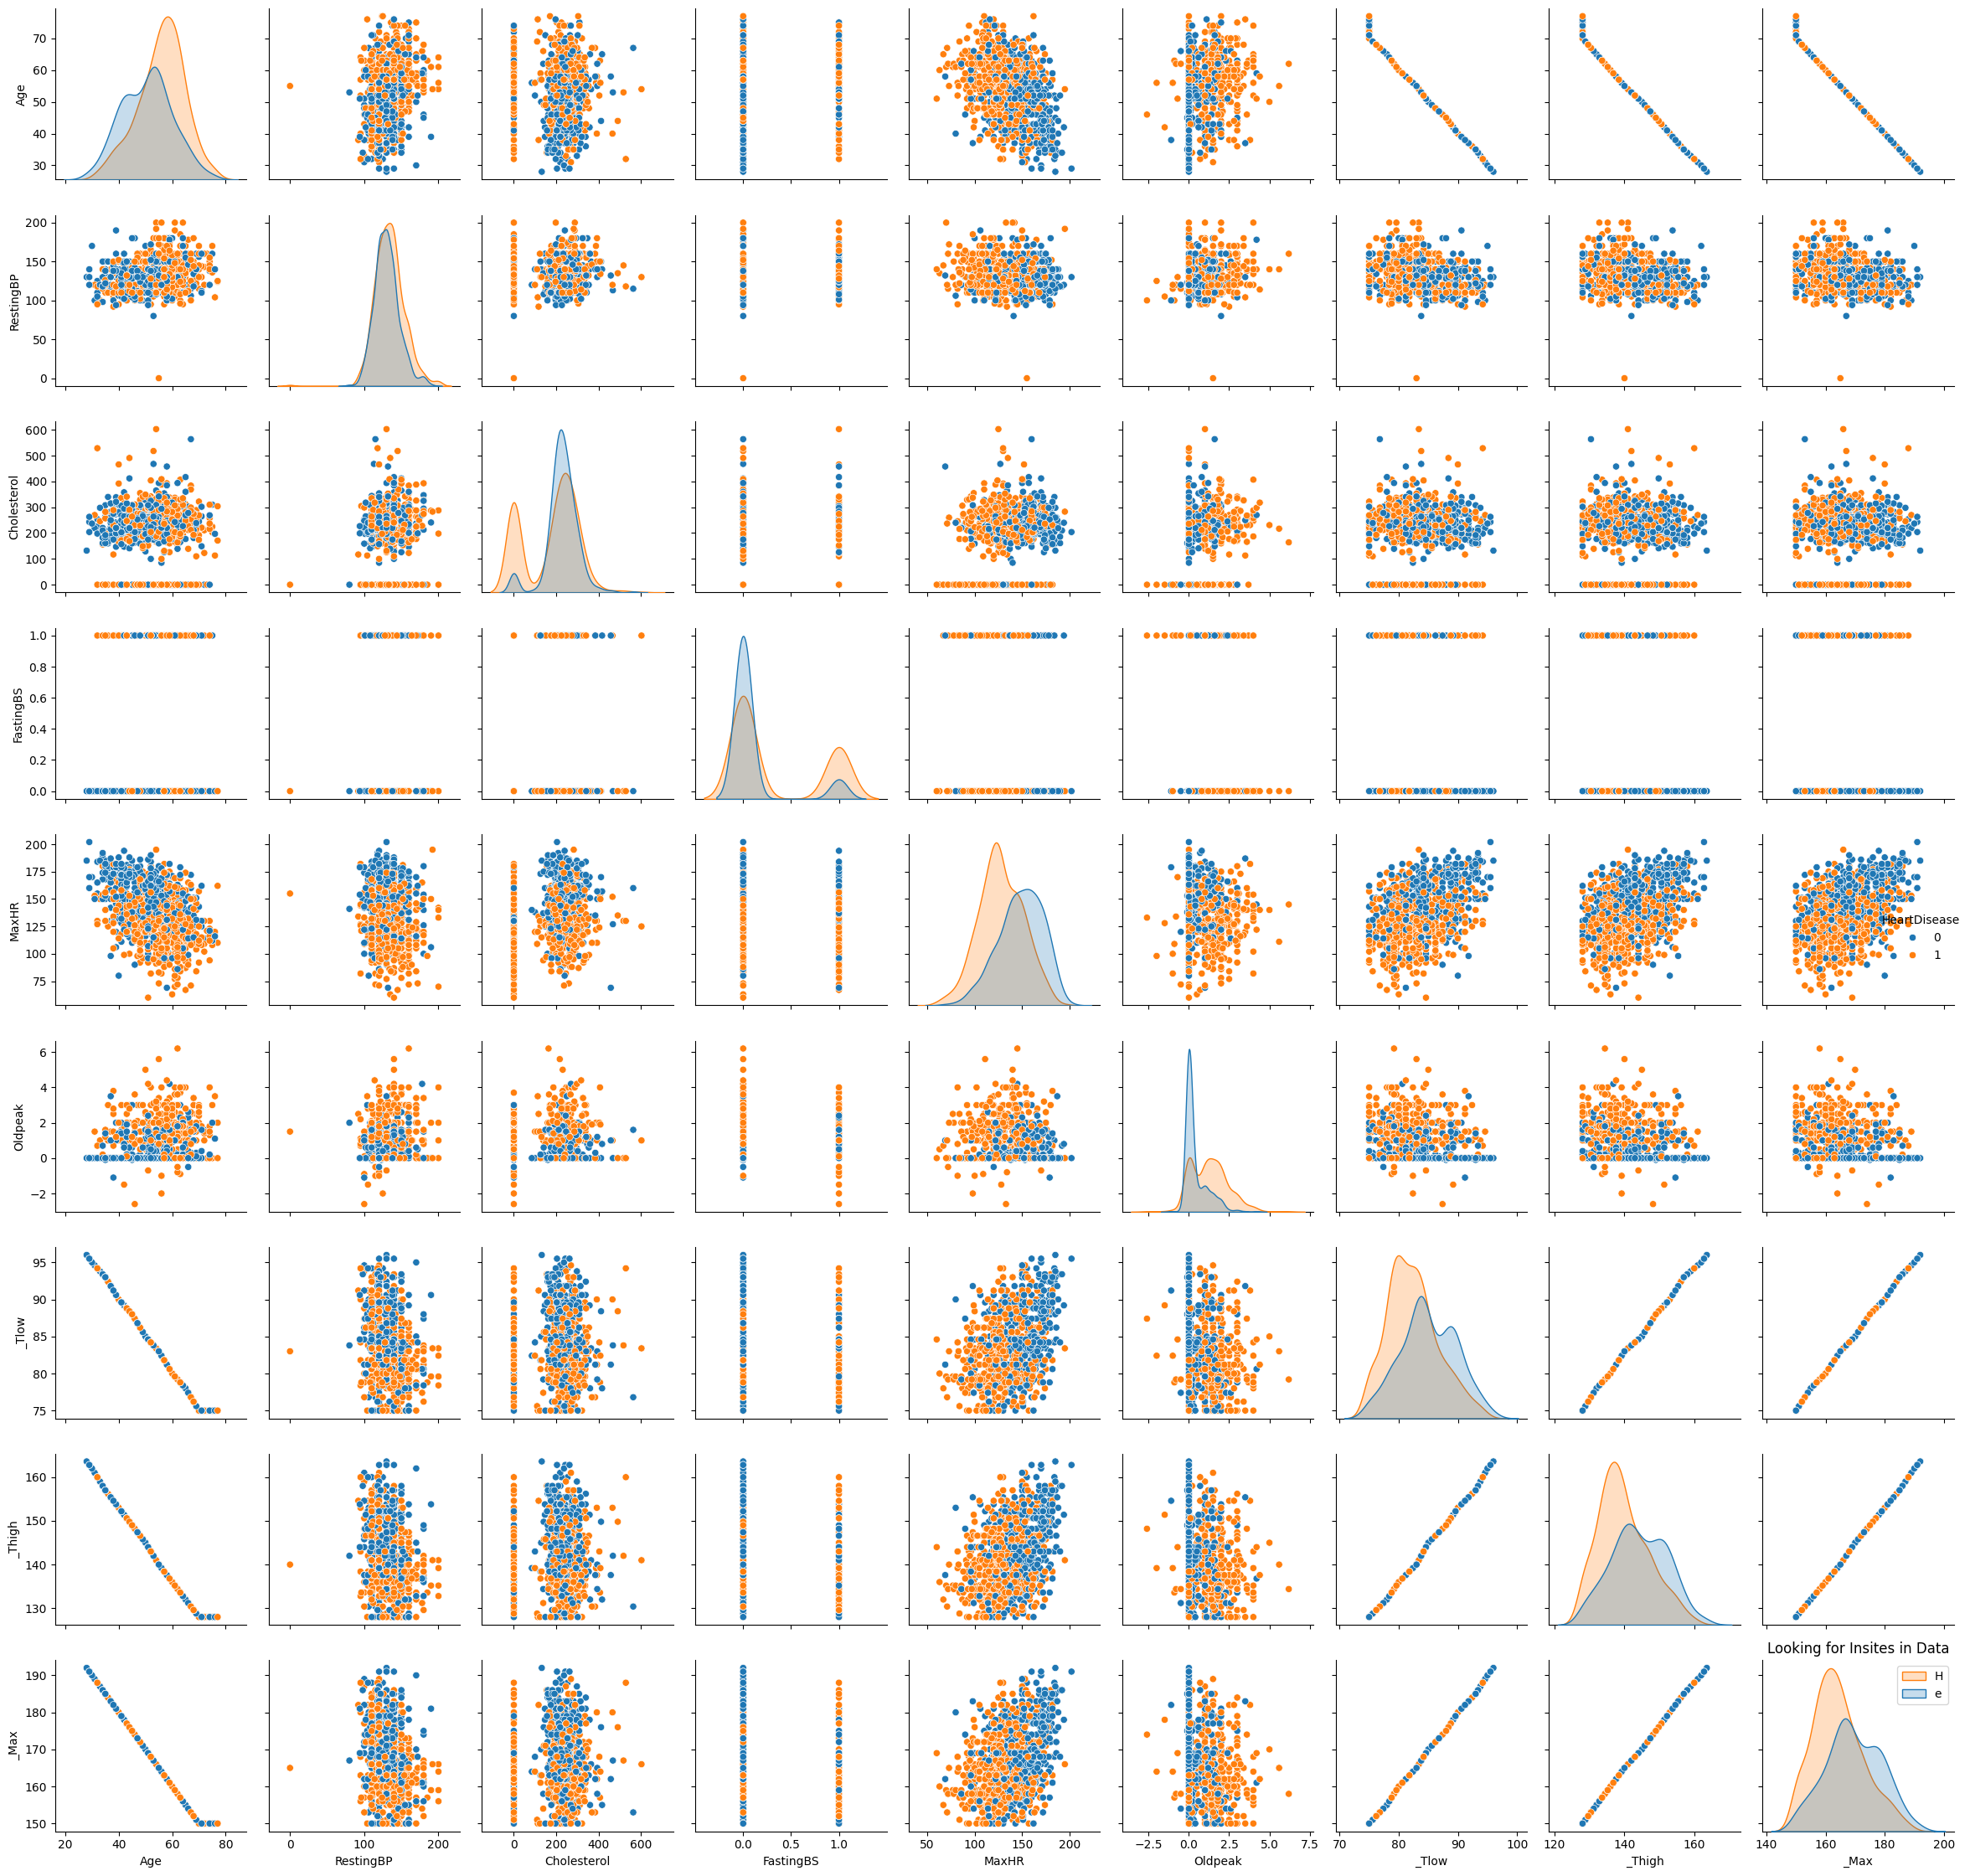

In [38]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [39]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# ---------- numeric features + target ----------
num_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
data_num = data[num_cols + ["HeartDisease"]].copy()
data_num["HeartDisease"] = pd.to_numeric(data_num["HeartDisease"], errors="coerce")

# ---------- 1) Full correlation (lower triangle only) ----------
corr = data_num.corr(method="pearson")
corr_rounded = corr.round(2)

# mask upper triangle (keep diagonal)
upper_mask = np.triu(np.ones_like(corr_rounded, dtype=bool), k=1)
z = corr_rounded.mask(upper_mask).values  # NaNs in upper triangle

# Build text but hide where NaN so no "null" appears
text = [[("" if (val is None or np.isnan(val)) else f"{val:.2f}") for val in row] for row in z]

fig_corr = go.Figure(
    data=go.Heatmap(
        z=z,
        x=corr_rounded.columns,
        y=corr_rounded.index,
        colorscale="RdYlGn",        # NEGATIVE=red  →  POSITIVE=green
        zmin=-1, zmax=1,
        colorbar=dict(title="r"),
        text=text,
        texttemplate="%{text}",
        hovertemplate="<b>%{y} vs %{x}</b><br>r = %{z:.2f}<extra></extra>",
        showscale=True
    )
)

fig_corr.update_layout(
    title="Correlation among features (with HeartDisease)",
    template="plotly_white",
    width=750, height=550,   # smaller size
    margin=dict(l=70, r=40, t=50, b=50)
)
fig_corr.show()

# ---------- 2) Correlation of each feature with the target ----------
corr_target = (
    data_num.drop(columns=["HeartDisease"])
          .corrwith(data_num["HeartDisease"])
          .round(3)
          .sort_values(ascending=False)
)

vals = corr_target.values
fig_target = go.Figure(
    data=go.Bar(
        x=corr_target.index,
        y=vals,
        marker=dict(
            color=vals,              # color by value
            colorscale="RdYlGn",
            cmin=-1, cmax=1,
            line=dict(color="#ffffff", width=1)
        ),
        text=[f"{v:.2f}" for v in vals],
        textposition="outside",
        hovertemplate="<b>%{x}</b><br>corr with HD = %{y:.3f}<extra></extra>"
    )
)

fig_target.update_layout(
    title="Correlation with the Target (HeartDisease)",
    xaxis_title="",
    yaxis_title="Pearson r",
    template="plotly_white",
    width=750, height=500,   # smaller size
    margin=dict(l=70, r=40, t=50, b=70)
)
fig_target.add_hline(y=0, line_width=1, line_dash="dash", line_color="gray")
fig_target.show()


1. Feature-to-Feature Correlation (Heatmap)

Oldpeak (ST depression) has the highest positive correlation with HeartDisease (r = 0.40), meaning greater ST depression is linked to higher heart disease risk.

Age shows a moderate positive correlation (r = 0.28) → older individuals are more prone to heart disease.

MaxHR (maximum heart rate) is negatively correlated (r = -0.40) → lower maximum heart rates are often seen in heart disease patients.

Cholesterol (-0.23) and RestingBP (0.11) show weak correlations → limited predictive power on their own.

- Overall, features are not strongly correlated with each other, which is good for model stability and avoids multicollinearity.

2. Feature-to-Target Correlation (Bar Chart)

Strongest predictors:

Oldpeak (+0.40): Higher ST depression → higher heart disease risk.

MaxHR (-0.40): Lower max heart rate → higher risk.

Moderate predictor:

Age (+0.28): Older age → increased risk.

Weak predictors:

RestingBP (0.11) and Cholesterol (-0.23): Weak individually but may contribute when combined with other features.

3. Key Takeaways

Oldpeak and MaxHR are the most important linear predictors.

Age provides moderate additional predictive value.

RestingBP and Cholesterol are weak alone but could help reveal hidden patterns when included in a model.

- A well-performing model should primarily rely on Oldpeak, MaxHR, and Age, while still considering the weaker features for completeness.

## Preprocess

In [5]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [7]:
mean = data['RestingBP'].mean()
data['RestingBP'] = data['RestingBP'].replace(0, mean)

In [8]:
data[(data['Cholesterol'] == 0) & (data['HeartDisease'] == 0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
301,55,M,ATA,140.0,0,0,ST,150,N,0.2,Up,0
307,53,M,ATA,130.0,0,0,ST,120,N,0.7,Down,0
310,65,M,ASY,155.0,0,0,Normal,154,N,1.0,Up,0
314,53,M,ASY,80.0,0,0,Normal,141,Y,2.0,Down,0
326,45,M,NAP,110.0,0,0,Normal,138,N,-0.1,Up,0
332,38,M,NAP,100.0,0,0,Normal,179,N,-1.1,Up,0
336,72,M,NAP,160.0,0,0,LVH,114,N,1.6,Flat,0
364,56,M,NAP,120.0,0,0,Normal,97,N,0.0,Flat,0
421,66,M,NAP,120.0,0,0,ST,120,N,-0.5,Up,0
423,60,M,NAP,180.0,0,0,ST,140,Y,1.5,Flat,0


In [9]:
mean = data['Cholesterol'].mean()
data.loc[(data["Cholesterol"] == 0) & (data["HeartDisease"] == 0), "Cholesterol"] = mean

/tmp/ipython-input-3933332274.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '198.7995642701525' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data["Cholesterol"] == 0) & (data["HeartDisease"] == 0), "Cholesterol"] = mean


In [10]:
data[(data['Cholesterol'] == 0) & (data['HeartDisease'] == 1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115.0,0.0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95.0,0.0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105.0,0.0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145.0,0.0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110.0,0.0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
508,67,M,ASY,120.0,0.0,1,Normal,150,N,1.5,Down,1
514,43,M,ASY,122.0,0.0,0,Normal,120,N,0.5,Up,1
518,48,M,NAP,102.0,0.0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130.0,0.0,0,LVH,122,Y,1.0,Flat,1


In [11]:
median = data['Cholesterol'].median()
data.loc[(data["Cholesterol"] == 0) & (data["HeartDisease"] == 1), "Cholesterol"] = median

## Encoding

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

binary_ordinal_cols = ["Sex", "ExerciseAngina", "ST_Slope"]

le = LabelEncoder()
for col in binary_ordinal_cols:
    data[col] = le.fit_transform(data[col])


# Nominal columns for one-hot encoding
nominal_cols = ["ChestPainType", "RestingECG"]

data = pd.get_dummies(data, columns=nominal_cols, dtype=int)

data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140.0,289.0,0,172,0,0.0,2,0,0,1,0,0,0,1,0
1,49,0,160.0,180.0,0,156,0,1.0,1,1,0,0,1,0,0,1,0
2,37,1,130.0,283.0,0,98,0,0.0,2,0,0,1,0,0,0,0,1
3,48,0,138.0,214.0,0,108,1,1.5,1,1,1,0,0,0,0,1,0
4,54,1,150.0,195.0,0,122,0,0.0,2,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132,0,1.2,1,1,0,0,0,1,0,1,0
914,68,1,144.0,193.0,1,141,0,3.4,1,1,1,0,0,0,0,1,0
915,57,1,130.0,131.0,0,115,1,1.2,1,1,1,0,0,0,0,1,0
916,57,0,130.0,236.0,0,174,0,0.0,1,1,0,1,0,0,1,0,0


## Split data

In [13]:
from sklearn.model_selection import train_test_split
# ======================
# 1. Separate Features (X) and Target (y)
# ======================
X = data.drop("HeartDisease", axis=1)   # Features
y = data["HeartDisease"]                # Target

# ======================
# 2. Split the dataset
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (734, 16)
Test set size: (184, 16)


### Normalize data, scale

In [14]:
from sklearn.preprocessing import RobustScaler  # or StandardScaler / MinMaxScaler

# 1) Pick ONLY the continuous numeric features to scale
num_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Safety: keep only those that exist in X (in case column names differ)
num_cols = [c for c in num_cols if c in X_train.columns]

# 2) Initialize scaler (Robust to outliers)
scaler = RobustScaler()

# 3) Fit on TRAIN only (avoid leakage), then transform both

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

print("Scaled columns:", num_cols)
X_train.head()

Scaled columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
795,-0.923077,1,-0.5,0.298246,1,1.513514,0,0.133333,0,0,0,1,0,0,1,0
25,-1.384615,1,0.0,-0.245614,0,1.081081,0,-0.400000,2,0,0,1,0,0,1,0
84,0.153846,1,1.0,-0.175439,1,-0.351351,1,0.266667,1,1,0,0,0,0,1,0
10,-1.307692,0,0.0,-0.210526,0,0.108108,0,-0.400000,2,0,0,1,0,0,1,0
344,-0.230769,1,-0.5,0.000000,1,-0.918919,0,-0.400000,1,1,0,0,0,0,1,0


Why we use the RobustScaler, because this data is sensitive data, and on the outliers, we did not change or handle it, so we need to make scale without change the values of outliers and we don't need to make any effect by the outliers, so we use it to scale data in same range without effect by the outlires

In [15]:
data.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST'],
      dtype='object')

## Modeling

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=300)

# 2) Fit the model on training data
log_reg.fit(X_train, y_train)

# 3) Make predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# ==========================
# Evaluation
# ==========================
print("✅ Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))

✅ Logistic Regression Results
Accuracy: 0.8532608695652174


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define model
log_reg = LogisticRegression(random_state=42)

# Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "max_iter": [10 , 50 , 100, 200 , 500]
}

# Grid Search with 5-fold cross validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring="f1",   # you can also try "accuracy", "recall", "roc_auc"
    n_jobs=-1,
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_log_reg = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_log_reg.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 1, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Test Accuracy: 0.8478260869565217

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


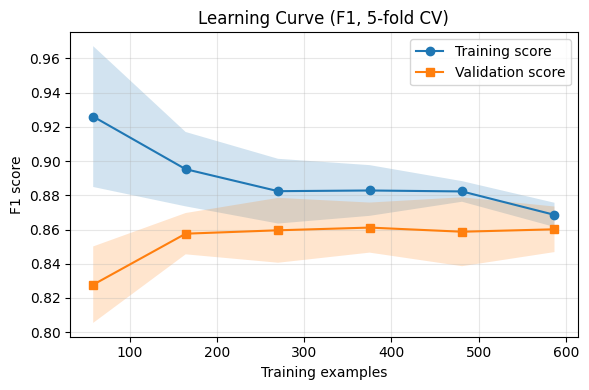

<Figure size 600x400 with 0 Axes>

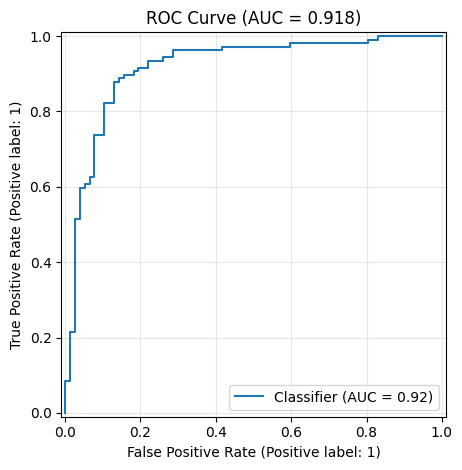

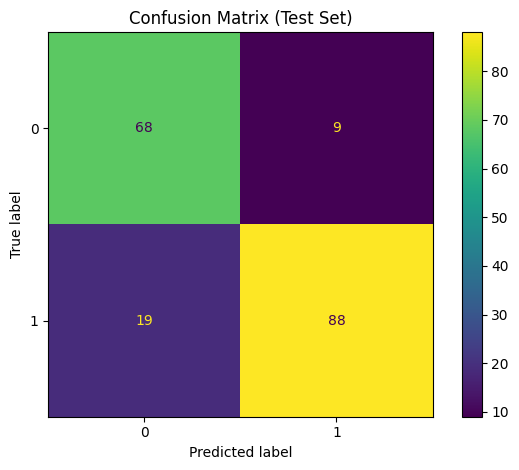

In [18]:
# --- Imports (safe to re-run) ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, RocCurveDisplay
)
from sklearn.model_selection import learning_curve

# --- 1) Learning curve (using the tuned model) ---
# Rebuild a fresh model with the best params so learning_curve can refit cleanly
best_params = grid_search.best_params_
lc_model = LogisticRegression(
    random_state=42,
    **{k: best_params[k] for k in best_params if k in ["C", "penalty", "solver", "max_iter"]}
)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=lc_model,
    X=X_train, y=y_train,
    cv=5,
    scoring="f1",             # use the same metric as your GridSearchCV
    train_sizes=np.linspace(0.1, 1.0, 6),
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_mean   = val_scores.mean(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(6,4))
plt.title("Learning Curve (F1, 5-fold CV)")
plt.plot(train_sizes, train_mean, marker="o", label="Training score")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.plot(train_sizes, val_mean, marker="s", label="Validation score")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)
plt.xlabel("Training examples")
plt.ylabel("F1 score")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 2) ROC curve + AUC (binary classification) ---
# Get class probabilities for the positive class
y_proba = best_log_reg.predict_proba(X_test)[:, 1]
auc_val = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title(f"ROC Curve (AUC = {auc_val:.3f})")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- 3) Confusion Matrix ---
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()


In [19]:
import shap #ip install shap
import matplotlib.pyplot as plt

In [20]:
# Use the best logistic regression model
explainer = shap.Explainer(best_log_reg, X_train)
shap_values = explainer(X_test)


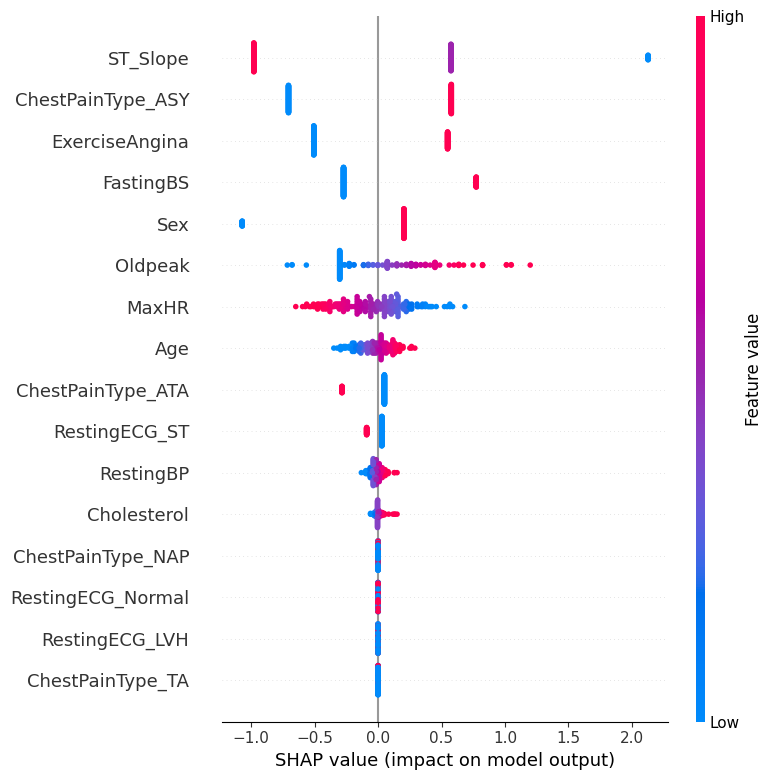

In [21]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

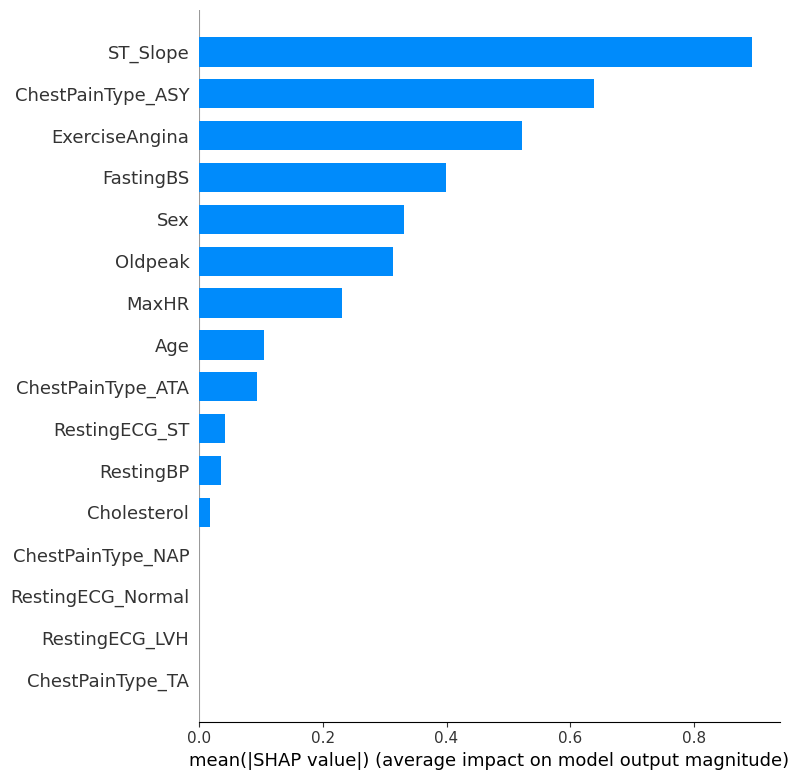

In [22]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")

In [23]:
X_train.iloc[0]

,795
Age,-0.923077
Sex,1.000000
RestingBP,-0.500000
Cholesterol,0.298246
FastingBS,1.000000
MaxHR,1.513514
ExerciseAngina,0.000000
Oldpeak,0.133333
ST_Slope,0.000000
ChestPainType_ASY,0.000000


In [24]:
y_test.iloc[0]

np.int64(0)

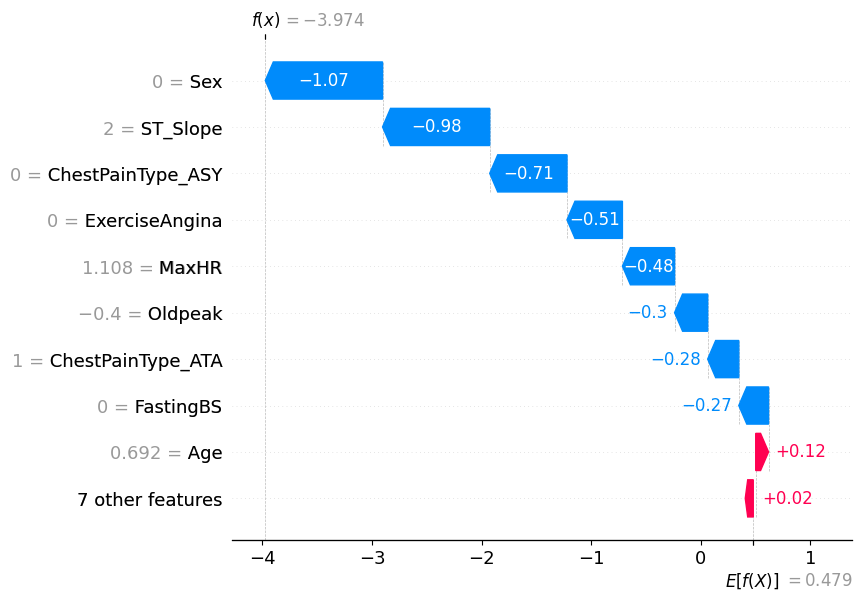

In [25]:
i = 0  # pick the first sample
shap.plots.waterfall(shap_values[i])

In [26]:
import joblib

# --- Save the Logistic Regression model ---
joblib.dump(best_log_reg, "best_logistic_regression_model.pkl")
print("Logistic Regression model saved as 'best_logistic_regression_model.pkl'")

# --- Save the scaler ---
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'")

# --- To load them later ---
# loaded_model = joblib.load("best_logistic_regression_model.pkl")
# loaded_scaler = joblib.load("scaler.pkl")


Logistic Regression model saved as 'best_logistic_regression_model.pkl'
Scaler saved as 'scaler.pkl'
